In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from football_sim.football_sim import *
import os
plt.rcParams['figure.figsize']=[16,9]

In [2]:
calibrator = Calibrator('calibration.pkl',redo=False)
calibrator.create_all_teams()
calibrator.process_data()
teams=calibrator.teams

calibration.pkl  exists.
file exists, loading
1113


In [3]:
Teams=dict()
League=dict()

In [5]:
country='UEFA'
home_advantage=[0,1]
print(home_advantage)
Teams[country]={x:teams[x] for x in teams if teams[x].country==country}
League[country]=Season(Teams[country],home_advantage=home_advantage)

#League[country].process_current_results(calibrator.get_current_results(country))
#League[country].simulate_season(n_scenarios=1000000)
df=League[country].season_report()
df['Rating']=df['Off']*(1-df['Deff'])
df

[0, 1]
simulation not yet done, simulating
simulation not yet processed, processing


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr,Rating
SPD,0,18.5,12,25,5,1,49.99,94.70,4.39,0.29,12.64,3.1169
GB,0,16.4,10,23,5,1,26.63,87.56,4.24,0.36,25.62,2.7136
BPL,0,13.4,7,20,6,1,9.43,69.10,3.19,0.35,51.52,2.0735
DE,0,12.2,6,19,6,1,6.13,55.68,3.85,0.47,64.33,2.0405
ISA,0,11.3,5,18,6,2,3.74,46.83,2.88,0.39,73.15,1.7568
FL1,0,11.2,5,18,6,2,4.08,46.13,3.61,0.49,72.74,1.8411


In [11]:
country='BPL'
lH,pH=calibrator.teams[country+'Home'].means()
lA,pA=calibrator.teams[country+'Away'].means()
home_advantage=np.array([lH-lA,pH/pA])
#home_advantage=[0,1]
print(home_advantage)
Teams[country]={x:teams[x] for x in teams if teams[x].country==country}
League[country]=Season(Teams[country],home_advantage=home_advantage,nr_cl=2)

League[country].process_current_results(calibrator.get_current_results(country))
#League[country].simulate_season(n_scenarios=1000000)
League[country].season_report()

[0.15810992 0.946899  ]
simulation not yet done, simulating
simulation not yet processed, processing


,Points (current),Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Liverpool,54,99.1,92,105,1,1,95.39,99.79,5.63,0.12,0.00
Manchester City,47,88.0,80,95,3,2,4.23,79.13,6.47,0.27,0.00
Tottenham Hotspur,48,82.5,75,90,4,2,0.34,18.83,5.37,0.31,0.00
Chelsea,44,76.2,68,84,6,3,0.04,2.02,4.13,0.25,0.00
Arsenal,41,70.6,62,79,6,4,0.00,0.21,5.31,0.47,0.00
Manchester United,38,66.9,59,75,7,4,0.00,0.02,5.21,0.44,0.00
Leicester City,31,54.1,46,62,12,7,0.00,0.00,2.72,0.33,0.00
Wolverhampton,29,51.8,44,60,13,7,0.00,0.00,2.73,0.36,0.00
Watford,29,51.2,43,59,14,7,0.00,0.00,3.54,0.45,0.00
Everton,27,50.5,42,59,14,7,0.00,0.00,3.52,0.43,0.00


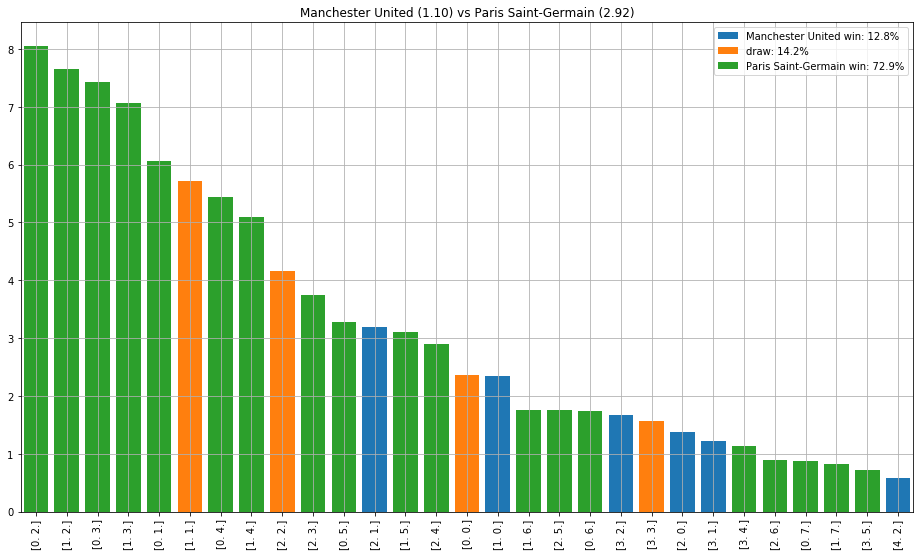

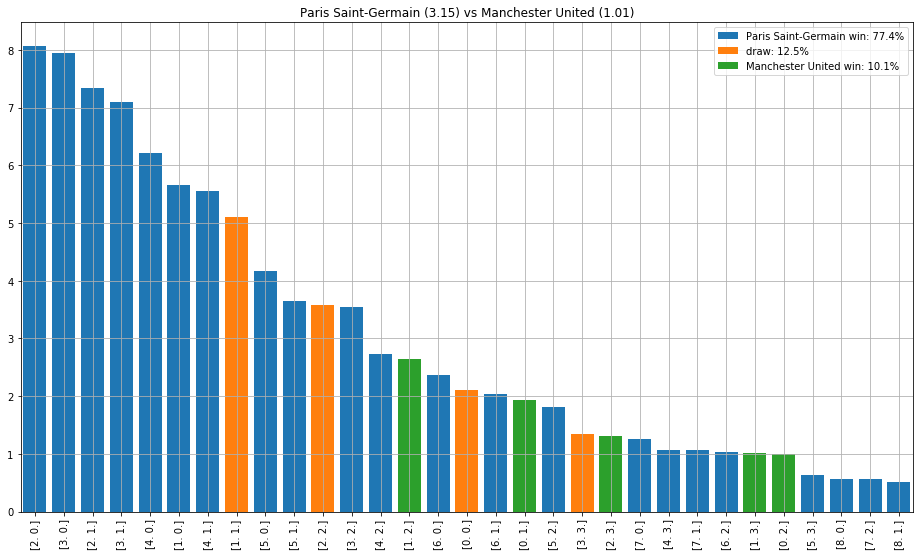

In [8]:
team1=teams['Manchester United']
team2=teams['Paris Saint-Germain']
fig=plt.figure(1)
team1.outcomes_vs(team2,home_advantage=np.array([lH-lA,pH/pA]))
fig.set_size_inches(16,9)
fig=plt.figure(2)
team2.outcomes_vs(team1,home_advantage=np.array([lH-lA,pH/pA]))
fig = plt.gcf()
fig.set_size_inches(16,9)

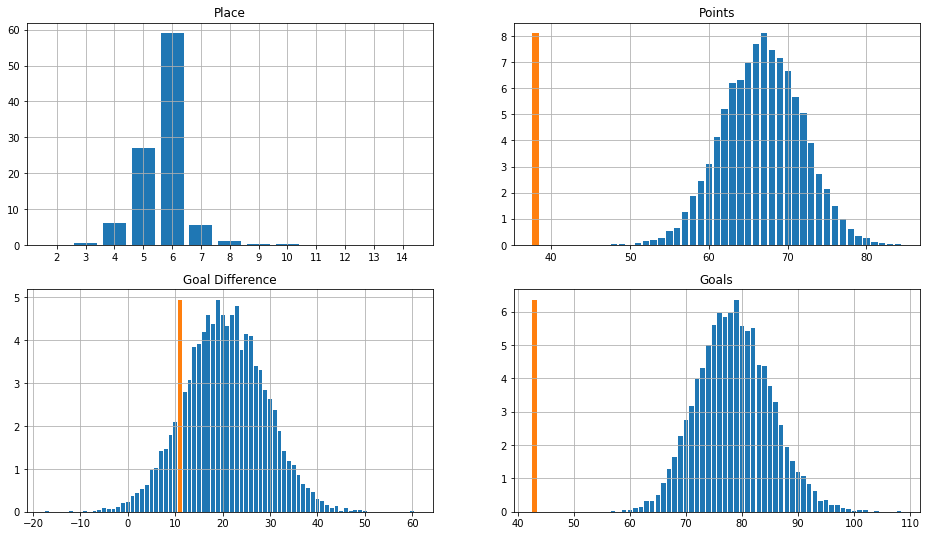

In [9]:
PremierLeague=League['BPL']
PremierLeague.team_report('Manchester United')

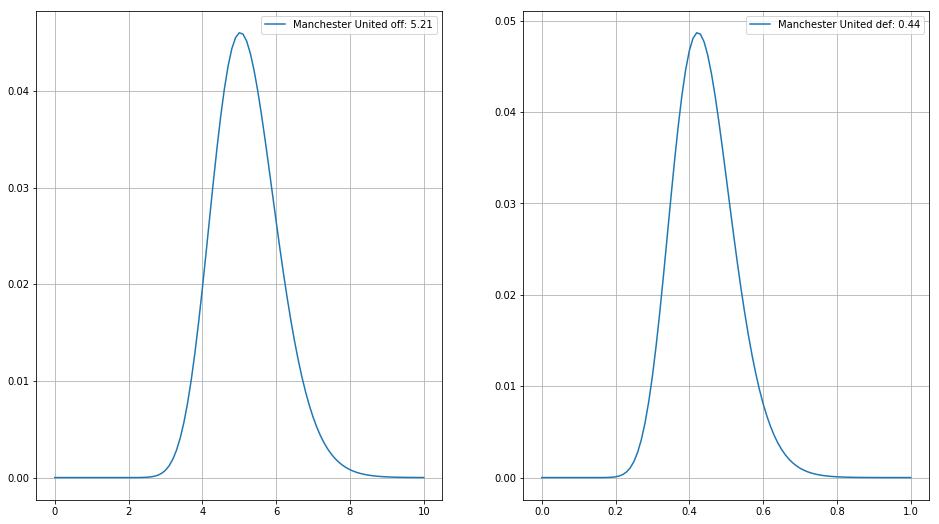

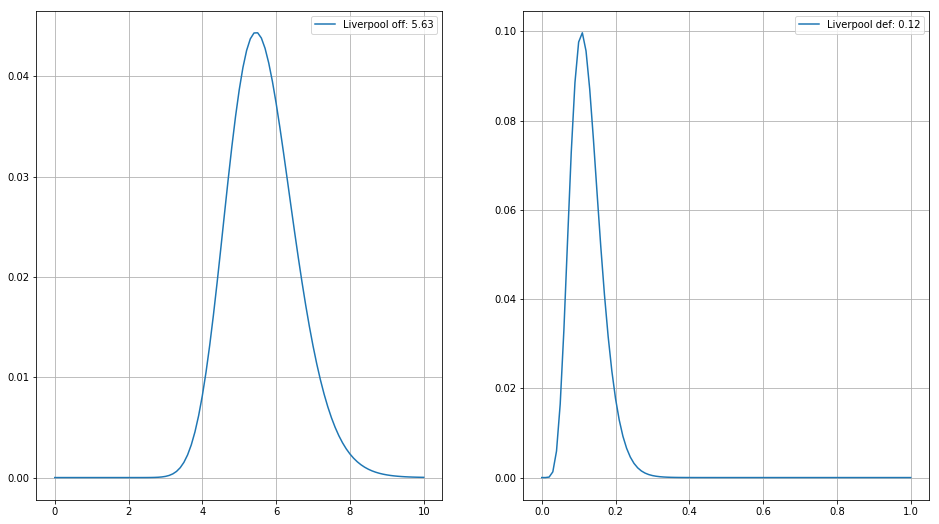

In [6]:
teams['Manchester United'].plt()
fig = plt.gcf()
fig.set_size_inches(16,9)
teams['Liverpool'].plt()
fig = plt.gcf()
fig.set_size_inches(16,9)

# Most important matches

array([6.89      , 6.98989021, 6.49350649, 5.56414219])

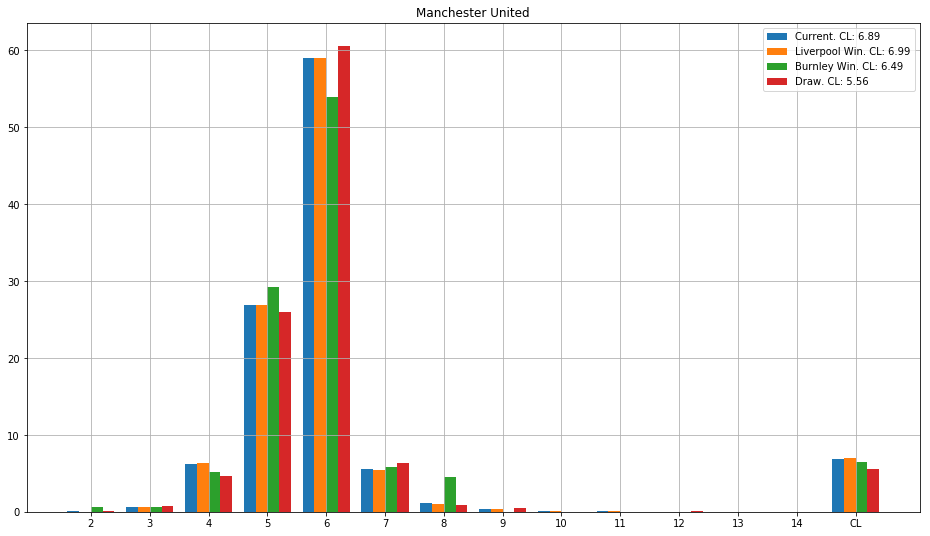

In [11]:
imp=[]
ref_team='Manchester United'
#ref_team='Liverpool'
#ref_team='Arsenal'
matches=[]
for x in PremierLeague.matches_to_sim:
    matches.append(x)
    pcl=PremierLeague.what_if(x,ref_team=ref_team,show_plot=False,place=2,or_better=True)
    #imp.append(pcl.max()/pcl.min())
    imp.append(pcl.std())
    #imp.append(1/pcl.min())
imp=np.array(imp)
matches=np.array(matches)
the_match=matches[imp.argmax()]
PremierLeague.what_if(the_match,ref_team=ref_team)

array([ 6.89      ,  5.11049724, 11.40275387,  6.7940552 ])

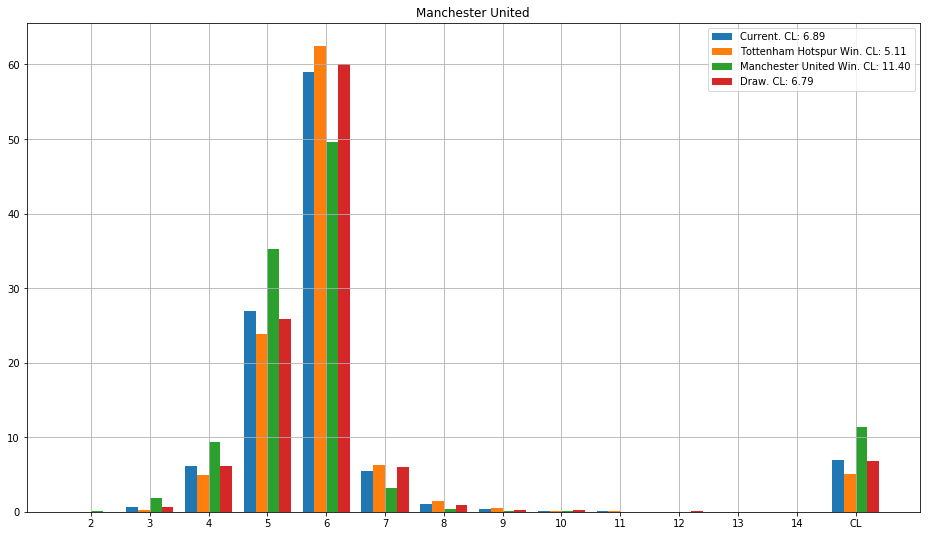

In [12]:
PremierLeague.what_if('Tottenham Hotspur v Manchester United',ref_team='Manchester United')

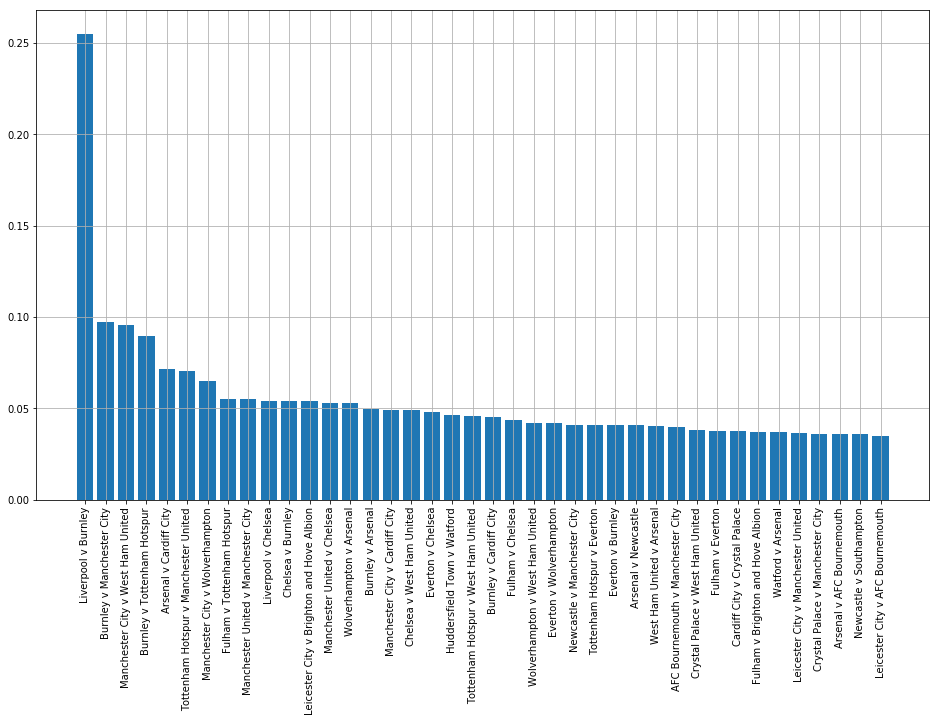

In [13]:
i_sort=(-imp).argsort()
matches=matches[i_sort]
imp=imp[i_sort]
xx=np.arange(40)
plt.bar(xx,imp[xx])
plt.xticks(xx,matches[xx],rotation=90);
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(16,9)

1.694194117647059

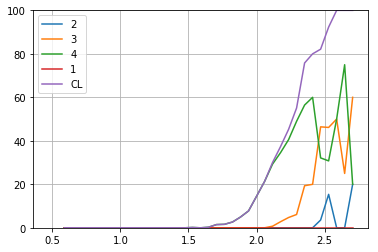

In [14]:
team_name='Manchester United'
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
ind=PremierLeague.place_per_team[i,:]<=4
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
#pnts=PremierLeague.points_per_team[i,ind]-PremierLeague.current_points['Man United']
pnts=PremierLeague.points_per_team[i,:]-PremierLeague.current_points[team_name]
plc=PremierLeague.place_per_team[i,:]

nrpnts=np.arange(5,3*n+1)
p=np.zeros([nrpnts.shape[0],6])
p[:]=np.nan
for jj in range(nrpnts.shape[0]):
    ind=pnts==nrpnts[jj]
    if ind.any():
        p[jj,0]=(plc[ind]==2).sum()/ind.sum()
        p[jj,1]=(plc[ind]==3).sum()/ind.sum()
        p[jj,2]=(plc[ind]==4).sum()/ind.sum()
        p[jj,3]=(plc[ind]<=4).sum()/ind.sum()
        p[jj,4]=(plc[ind]==1).sum()/ind.sum()
    

plt.plot(nrpnts/n,100*p[:,0],label='2')
plt.plot(nrpnts/n,100*p[:,1],label='3')
plt.plot(nrpnts/n,100*p[:,2],label='4')
plt.plot(nrpnts/n,100*p[:,4],label='1')
plt.plot(nrpnts/n,100*p[:,3],label='CL')
plt.legend()
plt.grid(True)
plt.ylim([0,100])
#plt.xlabel([0,3])
pnts.mean()/n